In [2]:
import sys
import os
import numpy as np
print(sys.executable)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import importlib
seaborn_found = importlib.util.find_spec('seaborn')
if seaborn_found is None:
    sys.write.stderr("[error] Seaborn package not found. exit")
    exit(-1)

import seaborn as sns
import pandas as pd

import matplotlib as mpl

#mpl.use("pgf")

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",          # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",   # unicode math setup
         r"\setmathfont{xits-math.otf}",
         ]
})


plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],                    # use latex default serif font
    "font.size": "22",
})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

plt.rcParams["lines.markeredgewidth"] = 1

# plt.rc('text', usetex=True)

FONT=18

sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 1.5, "axes.labelsize":FONT, "axes.titlesize":FONT, "legend.fontsize":FONT, "xtick.labelsize":FONT, "ytick.labelsize":FONT, "font.size":FONT})

sns.set_style("darkgrid", {'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.grid': True, "axes.facecolor": ".9", 'grid.linestyle': '-'})
sns.set_palette("dark")

DIR_DATA="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/1000genome"

fig_size_square = (5, 4)
fig_size_rect = (6.5, 4)

/usr/local/opt/python/bin/python3.7


In [3]:
csv_file = DIR_DATA+"/1000genome.csv"
csv_fgcs = DIR_DATA+"/1000genome-fgcs.csv"

CORE="1"
PLOT_DIR=os.getcwd()
# PLOT_DIR="/Users/lpottier/research/usc-isi/projects/paper-workflow-bb/figures/plots/simu-swarp"

OUTPUT = PLOT_DIR+"/"+"simu-1000Genome/"

In [4]:
try:
    # Create target Directory
    os.mkdir(OUTPUT)
    print("Directory " , OUTPUT ,  " Created ") 
except FileExistsError:
    print("Directory " , OUTPUT ,  " already exists")

Directory  /Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/notebooks/simu-1000Genome/  already exists


In [5]:
df = pd.read_csv(csv_file, sep=',')

In [6]:
df_fgcs = pd.read_csv(csv_fgcs, sep=',')

In [7]:

def plot_workflow_input_files(df, df_fgcs):

    xlabel='Input files in burst buffers (%)'
    ylabel='Execution time (s)'
    

    df2 = df.copy()
    
    df2.nbfilesinbb = (df2.nbfilesinbb*100)/22
    df2.rename(columns={'cori':'Cori'}, inplace=True)
    df2.rename(columns={'summit':'Summit'}, inplace=True)
    
    if len(df2.workflow.unique()) != 1:
        print("More than workflow in this data frame")
        return None
    
    f = plt.figure(figsize=fig_size_rect)
    f.patch.set_alpha(0)

    g = sns.lineplot(x="nbfilesinbb", y="Cori", data=df2,  color="r", markers=True)
    g = sns.lineplot(x="nbfilesinbb", y="Summit", data=df2,  color="black", markers=True)

    g.legend(loc='upper right', title='', labels=['Cori', 'Summit'])

    g.set(xlabel=xlabel, ylabel=ylabel)
    # plt.grid()

    plt.tight_layout()
    plt.savefig(OUTPUT+df2.workflow.unique()[0]+'-simu-nbfile.pdf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.savefig(OUTPUT+df2.workflow.unique()[0]+'-simu-nbfile.pgf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.show()


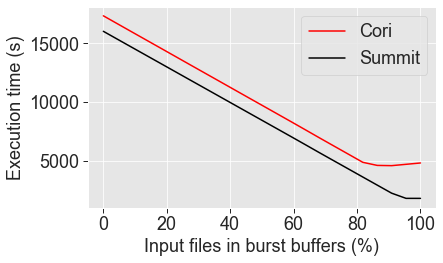

In [8]:
plot_workflow_input_files(df, df_fgcs)

In [9]:
# Data processing to make some correspondance between the data from the FGCS journal paper and the present work

#df      : workflow,nbfilesinbb,cori,summit
#df_fgcs : id,type,pop,makespan,io,iowait

total_gb_workflow = 52 # 67 Gb in total

# First we sort per BB usage
df_fgcs.sort_values(by='io', ascending=True)
df_fgcs['io_fraction'] = (df_fgcs.io*100)/total_gb_workflow  # transform into percentage over 67GB to match with our run

grouped = df_fgcs.groupby(['io', 'io_fraction']).agg({'makespan': lambda x: x.max() / x.min()}).rename(columns={'makespan': 'ratio'}).reset_index()

print(grouped)

           io  io_fraction     ratio
0    7.437788    14.303438  1.825878
1    7.446916    14.320992  1.705175
2    8.120249    15.615864  1.775851
3    8.151015    15.675028  1.732640
4    8.160318    15.692920  1.647559
5    8.582299    16.504420  1.740011
6    8.934864    17.182430  1.807298
7    8.944056    17.200108  1.747001
8    9.638038    18.534689  1.837386
9    9.647340    18.552577  1.769346
10  10.419269    20.037056  1.818046
11  10.428703    20.055198  1.757730
12  11.200527    21.539476  1.755516
13  11.903885    22.892087  1.712665
14  11.912536    22.908724  1.998604
15  12.694177    24.411879  1.730885
16  12.866725    24.743702  1.722535
17  12.967411    24.937329  1.687596
18  13.475278    25.913996  1.754571
19  14.247258    27.398572  1.737395


In [10]:
df_ratio = df.copy()
indexer = df_ratio[df_ratio['nbfilesinbb'] == 0].index
nobb_cori = df.loc[indexer,'cori']
nobb_summit = df.loc[indexer,'summit']

df_ratio['norm_cori'] = float(nobb_cori) / df_ratio['cori']
df_ratio['norm_summit'] = float(nobb_summit) / df_ratio['summit']
df_ratio['io_fraction'] = df_ratio['nbfilesinbb'] * 100.0 / 22 # To match with the I/0 Fraction from FGCS
df_ratio

,workflow,nbfilesinbb,cori,summit,norm_cori,norm_summit,io_fraction
0,1000Genome,0,17352.370,16029.530,1.000000,1.000000,0.000000
1,1000Genome,1,16657.370,15338.490,1.041723,1.045053,4.545455
2,1000Genome,2,15962.580,14647.980,1.087065,1.094317,9.090909
3,1000Genome,3,15269.810,13958.580,1.136384,1.148364,13.636364
4,1000Genome,4,14577.120,13269.260,1.190384,1.208020,18.181818
5,1000Genome,5,13882.830,12578.890,1.249916,1.274320,22.727273
6,1000Genome,6,13187.950,11888.280,1.315775,1.348347,27.272727
7,1000Genome,7,12495.510,11199.120,1.388688,1.431320,31.818182
8,1000Genome,8,11802.490,10509.550,1.470230,1.525235,36.363636
9,1000Genome,9,11108.450,9819.224,1.562087,1.632464,40.909091


In [11]:
# Compute error
avg_fgcs = np.mean(grouped['ratio'])
std_fgcs = np.std(grouped['ratio'])

print(avg_fgcs,std_fgcs)


1.763184367860013 0.07080546287855376


In [22]:
interval_min, interval_max = min(grouped['io_fraction']), max(grouped['io_fraction'])
df_ratio_interval = df_ratio.copy()
df_ratio_interval = df_ratio_interval[df_ratio_interval['io_fraction'] > interval_min]
df_ratio_interval = df_ratio_interval[df_ratio_interval['io_fraction'] < interval_max]
df_ratio_interval
avg = np.mean(df_ratio_interval['norm_cori'])
std = np.std(df_ratio_interval['norm_cori'])
print(avg,std)

print("ACCURACY COMPARED TO FGCS: ", 1 - abs((avg-avg_fgcs)/avg_fgcs))
df_ratio['acc_avg'] = 1 - abs((avg-avg_fgcs)/avg_fgcs)

1.2520248341677158 0.0512122371128307
ACCURACY COMPARED TO FGCS:  0.7100929755220695


0.2899070244779305

In [20]:
def plot_comparison_with_fgcs(df_ratio, df_fgcs):

    xlabel='Input files in burst buffers (%)'
    ylabel='Speedup when using BB'    

    if len(df_ratio.workflow.unique()) != 1:
        print("More than workflow in this data frame")
        return None
    
    f = plt.figure(figsize=(10, 5))
    f.patch.set_alpha(0)
    
    g = sns.lineplot(x="io_fraction", y="norm_cori", data=df_ratio, color="r", markers=True)
    g = sns.lineplot(x="io_fraction", y="norm_summit", data=df_ratio,  color="black", markers=True)
    g = sns.lineplot(x="io_fraction", y="ratio", data=df_fgcs,  color="blue", markers=True)
    ax2 = plt.axes([0.455, 0.58, .25, .2], facecolor='y')
    sns.lineplot(ax=ax2, x="io_fraction", y="norm_cori", data=df_ratio, color="r", markers=True)
    sns.lineplot(ax=ax2, x="io_fraction", y="ratio", data=df_fgcs,  color="blue", markers=True)
    ax2.axhline(y=1, linestyle="--", c='black')
    ax2.set_title('Accuracy: ' + str(round(min(df_ratio['acc_avg'])*100, 2)) +'%' )
    ax2.set_xlim([13,28])
    ax2.set_ylim([0.2,2.8])
    ax2.set_xlabel('')
    ax2.set_ylabel('')

    g.legend(loc='upper left', title='', labels=['Cori', 'Summit', 'Previous data'])

    g.set(xlabel=xlabel, ylabel=ylabel, ylim=(0,10), yticks=(range(1,11)))
    # plt.grid()
    g.axhline(y=1, linestyle="--", c='black')
    
    plt.tight_layout()
    plt.savefig(OUTPUT+df_ratio.workflow.unique()[0]+'-simu-norm.pdf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.savefig(OUTPUT+df_ratio.workflow.unique()[0]+'-simu-norm.pgf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.show()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


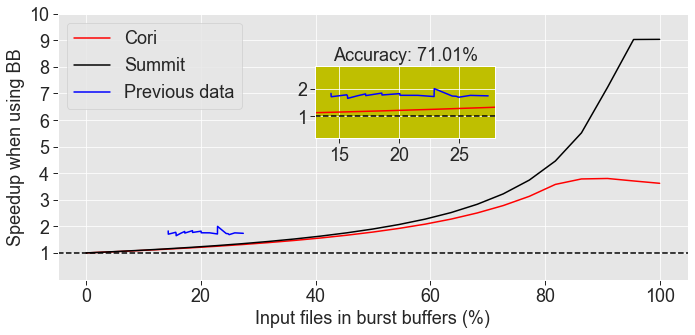

In [21]:
plot_comparison_with_fgcs(df_ratio, grouped)